# **Predictive Classification Analysis: Lung Cancer Prediction**
- **Nama:** Chatarina Evangelista Sitorus
- **Email:** chatarinaevas304@gmail.com
- **ID Dicoding:** dicodingchatzz

## **Latar Belakang**

Kanker paru-paru adalah penyakit yang memiliki tingkat mortalitas tinggi di seluruh dunia, terutama karena seringnya diagnosis baru ditemukan pada stadium lanjut. Gejala awal yang tidak spesifik serta ketergantungan pada metode deteksi invasif menjadi hambatan utama dalam skrining dan penanganan dini kanker paru.

Seiring dengan meningkatnya akses terhadap data kesehatan dan berkembangnya teknologi kecerdasan buatan, pendekatan berbasis machine learning (ML) mulai banyak digunakan dalam analisis risiko penyakit kronis, termasuk kanker paru-paru. ML menawarkan pendekatan non-invasif dan cepat dengan menganalisis data sederhana seperti usia, kebiasaan merokok, dan gejala awal.

Studi oleh **Chaturvedi et al. (2021)** menunjukkan bahwa berbagai teknik machine learning mampu memprediksi dan mengklasifikasikan kanker paru secara efektif menggunakan data gejala dan riwayat pasien. Penelitian lain oleh **Patra (2020)** juga membuktikan bahwa algoritma ML seperti Decision Tree dan Support Vector Machine dapat menghasilkan prediksi yang akurat hanya dengan input klinis dasar.

Sementara itu, **Gould et al. (2022)** menekankan bahwa data klinis rutin seperti riwayat pemeriksaan dan laboratorium dapat diintegrasikan dengan model pembelajaran mesin untuk meningkatkan akurasi identifikasi dini kanker paru-paru secara praktis di dunia nyata.

## **Tujuan Analisis dan Pengembangan**

Proyek ini bertujuan membangun sistem klasifikasi kanker paru-paru berbasis machine learning dengan memanfaatkan data klinis terbuka yang bersifat non-invasif. Sistem ini diharapkan dapat menjadi alat bantu skrining awal, terutama di fasilitas kesehatan yang memiliki keterbatasan dalam pemeriksaan radiologis atau molekuler.

## **Deskripsi Dataset**


Dataset yang digunakan adalah *Lung Cancer Dataset* dari platform [Kaggle](https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset). Dataset ini terdiri dari **3000 entri** dengan **16 fitur**, yang mencakup informasi demografis (seperti usia dan jenis kelamin), kebiasaan (seperti merokok dan konsumsi alkohol), serta gejala-gejala umum seperti batuk, sesak napas, dan nyeri dada. Label target adalah `LUNG_CANCER` dengan nilai `YES` atau `NO`.

## **Referensi:**

Chaturvedi, P., Jhamb, A., Vanani, M., & Nemade, V. (2021). Prediction and classification of lung cancer using machine learning techniques. *IOP Conference Series: Materials Science and Engineering, 1099*(1), 012059. https://doi.org/10.1088/1757-899X/1099/1/012059

Gould, M. K., Huang, B. Z., Tammemagi, M. C., Kinar, Y., & Shiff, R. (2022). Machine learning for early lung cancer identification using routine clinical and laboratory data. *American Journal of Respiratory and Critical Care Medicine, 205*(3), 350–352. https://doi.org/10.1164/rccm.202007-2791OC

Patra, R. (2020). Prediction of lung cancer using machine learning classifier. In S. C. Satapathy, V. Bhateja, & S. Das (Eds.), *Data management, analytics and innovation* (pp. 107–120). Springer. https://doi.org/10.1007/978-981-15-6648-6_11


## **Import Packages/Library**

Tahapan ini dilakukan untuk memuat seluruh library yang dibutuhkan dalam proses analisis data, visualisasi, dan pembuatan model machine learning.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import shutil
from google.colab import drive

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    precision_score, recall_score, f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## **Data Loading**

Dataset yang digunakan adalah *Lung Cancer Dataset* dari Kaggle dengan ID `akashnath29/lung-cancer-dataset`.

Proses pemuatan data dilakukan melalui `KaggleHub` dan `Google Drive` agar file `.csv` dapat diproses langsung di environment Google Colab. Tahapannya meliputi:
- Mengunduh dataset dari Kaggle.
- Menyalin file `.csv` ke folder Google Drive.
- Memuat dataset ke dalam bentuk DataFrame menggunakan `pandas`.

Langkah ini penting untuk memastikan data tersedia secara persistensi di Colab, terutama saat runtime terputus.


- Memuat dataset Lung Cancer Dataset menggunakan KaggleHub

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
kaggle_path = kagglehub.dataset_download("akashnath29/lung-cancer-dataset")
print("Dataset berhasil diunduh dari KaggleHub ke:", kaggle_path)

Dataset berhasil diunduh dari KaggleHub ke: /kaggle/input/lung-cancer-dataset


In [5]:
# Lihat isi folder hasil unduhan
print("Daftar file dalam folder:", kaggle_path)
print(os.listdir(kaggle_path))

Daftar file dalam folder: /kaggle/input/lung-cancer-dataset
['dataset.json', 'dataset.csv']


In [6]:
# Path asli file yang diunduh
source_file = os.path.join(kaggle_path, "dataset.csv")
print("File asli ditemukan di:", source_file)

File asli ditemukan di: /kaggle/input/lung-cancer-dataset/dataset.csv


In [7]:
# Tujuan akhir di Google Drive
target_path = "/content/drive/MyDrive/Coding Camp 2025/ML Terapan/Proyek 1/lung_cancer_dataset.csv"
shutil.copy(source_file, target_path)
print("Dataset berhasil disalin ke Google Drive di:", target_path)

Dataset berhasil disalin ke Google Drive di: /content/drive/MyDrive/Coding Camp 2025/ML Terapan/Proyek 1/lung_cancer_dataset.csv


In [8]:
# Load ulang dataset dari Google Drive
df_lung = pd.read_csv(target_path)
print("Dataset kanker paru-paru berhasil dimuat ke dalam DataFrame.")

Dataset kanker paru-paru berhasil dimuat ke dalam DataFrame.


- Menampilkan 5 baris data teratas dari DataFrame

In [9]:
df_lung.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


- Deskripsi Singkat Fitur

  Dataset yang digunakan terdiri atas 3000 entri dan memuat 15 fitur prediktor serta 1 variabel target. Semua atribut bersumber dari data klinis yang bersifat non-citra (*non-visual*), sehingga sesuai untuk pemodelan berbasis pengisian survei atau wawancara medis sederhana.


- Tabel Deskripsi Fitur

| **Fitur**               | **Deskripsi**                                      |
|-------------------------|----------------------------------------------------|
| `GENDER`                | Jenis kelamin pasien (M = Male, F = Female)        |
| `AGE`                   | Usia pasien dalam satuan tahun                     |
| `SMOKING`               | Status merokok (1 = Tidak, 2 = Ya)                 |
| `YELLOW_FINGERS`        | Ada/tidaknya noda kuning pada jari karena nikotin  |
| `ANXIETY`               | Riwayat gangguan kecemasan                         |
| `PEER_PRESSURE`         | Terpengaruh tekanan sosial dari lingkungan         |
| `CHRONIC_DISEASE`       | Memiliki penyakit kronis atau komorbiditas         |
| `FATIGUE`               | Mengalami kelelahan berkepanjangan                 |
| `ALLERGY`               | Riwayat alergi terhadap zat atau lingkungan tertentu |
| `WHEEZING`              | Napas berbunyi/mengi                               |
| `ALCOHOL_CONSUMING`     | Kebiasaan mengonsumsi alkohol                      |
| `COUGHING`              | Batuk kronis atau terus-menerus                    |
| `SHORTNESS_OF_BREATH`   | Sesak napas atau kesulitan bernapas                |
| `SWALLOWING_DIFFICULTY` | Sulit menelan makanan atau minuman                 |
| `CHEST_PAIN`            | Nyeri di bagian dada                              |
| `LUNG_CANCER`           | Target klasifikasi (YES = Kanker, NO = Tidak)      |



## **Exploratory Data Analysis (EDA) / Data Understanding**

Dataset dieksplorasi untuk memahami struktur data, jumlah fitur, dan distribusi target (LUNG_CANCER), serta dilakukan visualisasi korelasi antar fitur untuk melihat potensi keterkaitan antar variabel.

- Melihat contoh data acak
  
  Dlakukan untuk mendapatkan gambaran awal struktur dan isi data secara visual.

In [10]:
df_lung.sample(7)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2007,M,35,1,1,2,2,1,1,2,1,2,1,1,2,1,NO
2992,F,46,2,2,2,2,1,1,1,1,1,1,2,1,2,NO
1851,M,41,2,2,1,1,2,1,1,1,2,1,2,2,2,NO
1283,F,65,1,1,1,2,2,2,2,1,2,1,1,2,2,NO
1479,F,51,1,1,2,2,1,2,1,2,2,1,1,2,2,NO
177,F,54,2,2,1,2,1,2,1,1,1,2,2,1,1,NO
1116,M,42,2,1,2,1,2,1,2,1,2,2,1,2,2,YES


- Ukuran dataset

  Menunjukkan jumlah sampel dan fitur yang tersedia dalam dataset untuk memastikan cukup untuk pelatihan model.

In [11]:
rows, cols = df_lung.shape
print(f"Dataset ini terdiri dari {rows} sampel, masing-masing dengan {cols} fitur yang merepresentasikan karakteristik pasien serta gejala-gejala terkait kanker paru-paru.")

Dataset ini terdiri dari 3000 sampel, masing-masing dengan 16 fitur yang merepresentasikan karakteristik pasien serta gejala-gejala terkait kanker paru-paru.


- Struktur data

  Dilakukan untuk melihat tipe data, jumlah kolom, dan memverifikasi tidak ada nilai yang hilang.

In [12]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

- Meninjau nilai unik pada fitur kategorikal

  Untuk memahami jumlah kategori dalam fitur tertentu yang berformat kategorikal seperti GENDER dan LUNG_CANCER.

In [13]:
print("Isi unik kolom GENDER:", df_lung["GENDER"].unique())
print("Isi unik kolom LUNG_CANCER:", df_lung["LUNG_CANCER"].unique())

Isi unik kolom GENDER: ['M' 'F']
Isi unik kolom LUNG_CANCER: ['NO' 'YES']


- Statistik Deskriptif

  Memberikan ringkasan statistik untuk fitur numerik seperti mean, standar deviasi, dan rentang nilai.

In [14]:
df_lung.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


- Jumlah nilai unik tiap kolom

  Melihat variasi nilai pada setiap fitur, berguna untuk identifikasi data diskret.

In [15]:
print("Jumlah nilai unik di setiap kolom:")
print(df_lung.nunique())

Jumlah nilai unik di setiap kolom:
GENDER                    2
AGE                      51
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               2
dtype: int64


- Cek data duplikat

  Memastikan tidak ada data duplikat yang dapat memengaruhi hasil pelatihan model.

In [16]:
print(f"Jumlah data duplikat: {df_lung.duplicated().sum()}")

Jumlah data duplikat: 2


- Cek data *null*

  Memastikan tidak ada nilai kosong (*null*) yang dapat menyebabkan error saat pemodelan.

In [17]:
print("Nilai null per kolom:")
print(df_lung.isna().sum())

Nilai null per kolom:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


- Correlation Matrix (Heatmap)

  Mengevaluasi korelasi antar fitur numerik, yang membantu dalam seleksi fitur atau deteksi multikolinearitas.

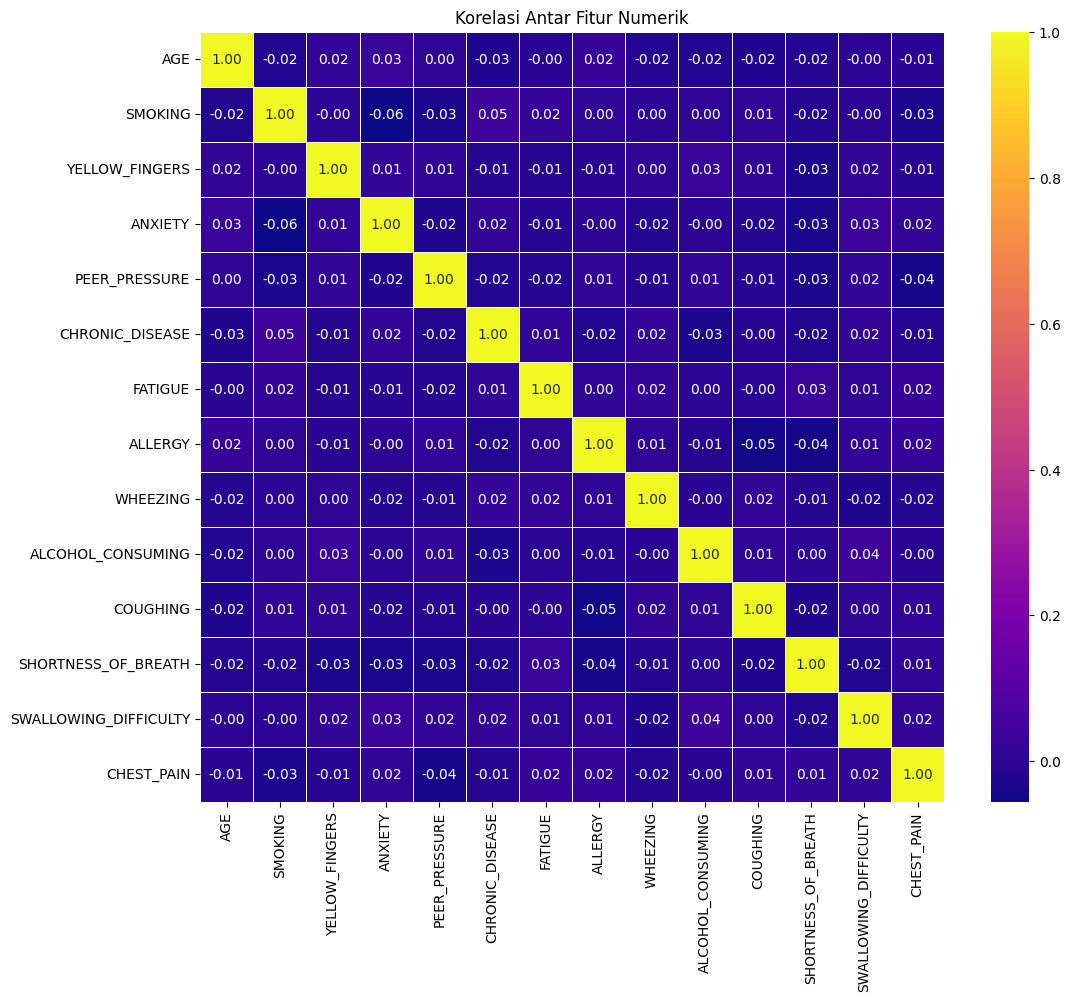

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_lung.corr(numeric_only=True), annot=True, cmap="plasma", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


- Boxplot untuk Deteksi Outlier pada Fitur AGE

  Visualisasi ini membantu mendeteksi nilai ekstrim (outlier) pada distribusi usia.

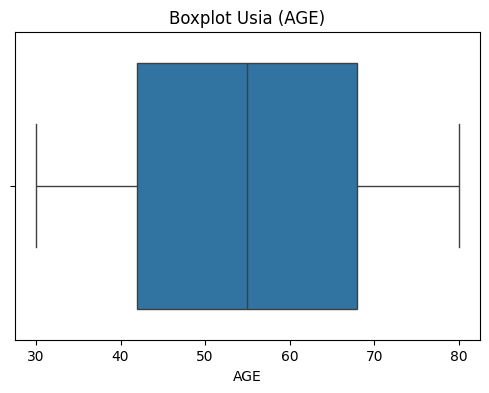

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_lung["AGE"])
plt.title("Boxplot Usia (AGE)")
plt.xlabel("AGE")
plt.show()


- Visualisasi Distribusi Gender dan Status Kanker Paru

  Untuk memahami proporsi kategori GENDER dan LUNG_CANCER secara visual.

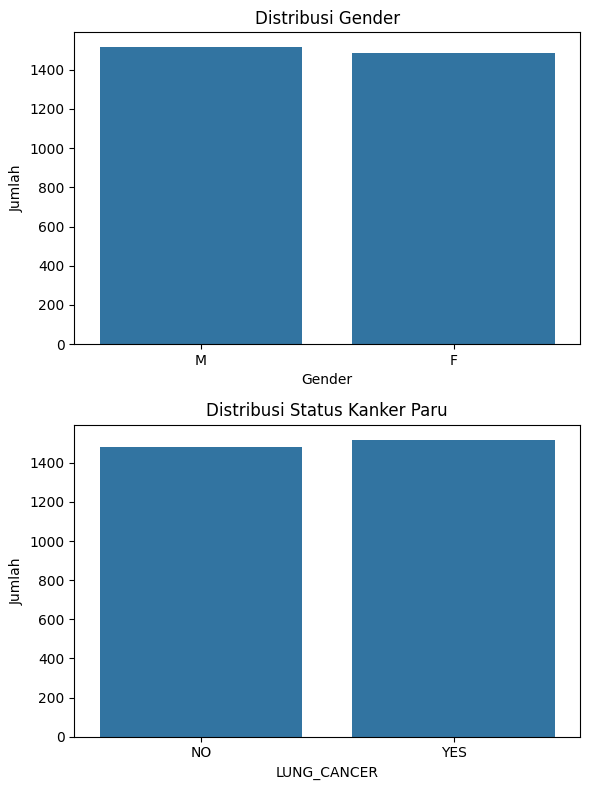

In [20]:
plt.figure(figsize=(6, 8))

# Plot Distribusi GENDER
plt.subplot(2, 1, 1)
sns.countplot(x="GENDER", data=df_lung)
plt.title("Distribusi Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah")

# Plot Distribusi LUNG_CANCER
plt.subplot(2, 1, 2)
sns.countplot(x="LUNG_CANCER", data=df_lung)
plt.title("Distribusi Status Kanker Paru")
plt.xlabel("LUNG_CANCER")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


- Visualisasi Distribusi AGE

  Untuk melihat sebaran usia pasien sebelum dilakukan standarisasi, membantu memahami distribusi nilai numerik utama dalam dataset.

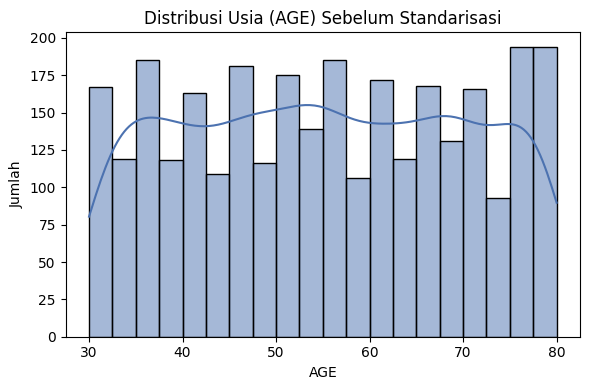

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_lung, x="AGE", kde=True, bins=20, color="#4C72B0")
plt.title("Distribusi Usia (AGE) Sebelum Standarisasi")
plt.xlabel("AGE")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

## Data Preprocessing / Data Preparation

Data preprocessing dilakukan dengan encoding nilai kategorikal, remap nilai biner menjadi 0/1 agar seragam, serta standarisasi kolom AGE untuk memastikan semua fitur berada dalam skala yang seimbang sebelum dimasukkan ke model.

In [22]:
# Menyalin DataFrame untuk preprocessing
df_processed = df_lung.copy()
print("Dataframe berhasil disalin untuk proses selanjutnya.")

Dataframe berhasil disalin untuk proses selanjutnya.


- Menangani data duplikat

In [23]:
sebelum = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
setelah = df_processed.shape[0]
print(f"Data duplikat dihapus: {sebelum - setelah} baris duplikat ditemukan dan dihapus.")

Data duplikat dihapus: 2 baris duplikat ditemukan dan dihapus.


In [24]:
# Pengecekan ulang setelah hapus data duplikat
print(f"Jumlah data duplikat setelah dihapus: {df_processed.duplicated().sum()}")
print(f"Total baris data setelah dibersihkan: {df_processed.shape[0]}")

Jumlah data duplikat setelah dihapus: 0
Total baris data setelah dibersihkan: 2998


- Encoding Fitur Kategorikal
  
  Beberapa fitur dalam dataset ini masih berupa data kategorikal, contohnya seperti kolom GENDER dan LUNG_CANCER yang berisi nilai seperti "M", "F", "YES", atau "NO". Karena model machine learning hanya bisa bekerja dengan data numerik, maka perlu dilakukan proses konversi terhadap nilai-nilai tersebut.

  Dalam kasus ini, seluruh kolom kategorikal hanya memiliki dua kemungkinan nilai (biner), sehingga pendekatan yang paling sederhana dan efisien adalah dengan menggunakan Label Encoding. Metode ini akan mengubah setiap kategori menjadi angka, misalnya "M" menjadi 1 dan "F" menjadi 0. Setelah proses ini dilakukan, data siap digunakan untuk pelatihan model.

In [25]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 2998 non-null   object
 1   AGE                    2998 non-null   int64 
 2   SMOKING                2998 non-null   int64 
 3   YELLOW_FINGERS         2998 non-null   int64 
 4   ANXIETY                2998 non-null   int64 
 5   PEER_PRESSURE          2998 non-null   int64 
 6   CHRONIC_DISEASE        2998 non-null   int64 
 7   FATIGUE                2998 non-null   int64 
 8   ALLERGY                2998 non-null   int64 
 9   WHEEZING               2998 non-null   int64 
 10  ALCOHOL_CONSUMING      2998 non-null   int64 
 11  COUGHING               2998 non-null   int64 
 12  SHORTNESS_OF_BREATH    2998 non-null   int64 
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64 
 14  CHEST_PAIN             2998 non-null   int64 
 15  LUNG_CANCER            299

In [26]:
# Remap kolom bernilai 1 dan 2 menjadi 0 dan 1
kolom_biner = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
    'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'
]
df_processed[kolom_biner] = df_processed[kolom_biner].replace({1: 0, 2: 1})
print("Kolom biner berhasil diremap ke nilai 0 dan 1.")

Kolom biner berhasil diremap ke nilai 0 dan 1.


In [27]:
# Identifikasi kolom kategorikal (bertipe object)
kolom_kategorikal = df_processed.select_dtypes(include='object').columns.tolist()
print("Fitur kategorikal yang akan diencoding:", kolom_kategorikal)

# Inisialisasi encoder
encoder = LabelEncoder()

# Transformasi label encoding
for fitur in kolom_kategorikal:
    df_processed[fitur] = encoder.fit_transform(df_processed[fitur])

print("Encoding berhasil dilakukan pada kolom-kolom kategorikal.")


Fitur kategorikal yang akan diencoding: ['GENDER', 'LUNG_CANCER']
Encoding berhasil dilakukan pada kolom-kolom kategorikal.


In [28]:
# Cek hasil encoding pada kolom yang diubah
display(df_processed[kolom_kategorikal].head())

,GENDER,LUNG_CANCER
0,1,0
1,0,0
2,0,1
3,1,1
4,0,0


Hasil encoding berhasil mengubah nilai kategorikal menjadi angka agar dapat digunakan oleh model machine learning.
LabelEncoder bekerja berdasarkan urutan alfabet, sehingga:

  a) "F" dan "NO" dikodekan menjadi 0

  b) "M" dan "YES" dikodekan menjadi 1

Fitur kategorikal seperti GENDER dan LUNG_CANCER sudah dalam format numerik yang sesuai untuk proses pelatihan model.

In [29]:
df_processed.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0


Proses encoding dan remap nilai biner telah berhasil dilakukan.

  a) Kolom kategorikal seperti GENDER dan LUNG_CANCER yang awalnya berisi nilai "F"/"M" dan "NO"/"YES" kini telah dikonversi menjadi 0 dan 1 menggunakan LabelEncoder Proses ini mengikuti urutan alfabet, sehingga "F" dan "NO" menjadi 0, sedangkan "M" dan "YES" menjadi 1.

  b) Sementara itu, kolom-kolom lain seperti SMOKING, ANXIETY, dan fitur biner lainnya yang semula bernilai 1 dan 2, telah diubah menjadi 0 dan 1 agar konsisten secara numerik dan siap digunakan dalam pelatihan model.

- Splitting Data

  Sebelum melatih model, data perlu dibagi menjadi dua bagian: data latih untuk membangun model, dan data uji untuk mengukur performanya.
  Pada proyek ini, data dibagi 80% untuk pelatihan dan 20% untuk pengujian, agar evaluasi lebih objektif dan menghindari overfitting.

In [30]:
# Pemisahan fitur dan target
X = df_processed.drop("LUNG_CANCER", axis=1)
y = df_processed["LUNG_CANCER"]

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Hasil splitting
print(f"Total keseluruhan data: {len(X)}, Data Train: {len(X_train)}, Data Test: {len(X_test)}")

Total keseluruhan data: 2998, Data Train: 2398, Data Test: 600


- Standarisasi fitur numerik (AGE)

  Satu-satunya fitur numerik kontinu pada dataset ini adalah AGE, sedangkan fitur lainnya berupa biner (0 atau 1). Oleh karena itu, proses standarisasi hanya dilakukan pada AGE agar berada pada skala yang setara (rata-rata 0 dan standar deviasi 1). Ini penting agar fitur tersebut tidak mendominasi proses pembelajaran model.

In [33]:
# Statistik sebelum standarisasi
print("Statistik kolom AGE sebelum standarisasi:")
print("Mean:", round(X_train["AGE"].mean(), 4))
print("Std Dev:", round(X_train["AGE"].std(), 4))


Statistik kolom AGE sebelum standarisasi:
Mean: 55.2143
Std Dev: 14.7082


In [34]:
# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi hanya pada kolom AGE
X_train["AGE"] = scaler.fit_transform(X_train[["AGE"]])
X_test["AGE"] = scaler.transform(X_test[["AGE"]])

print("Standarisasi pada kolom AGE telah berhasil dilakukan.")

Standarisasi pada kolom AGE telah berhasil dilakukan.


In [35]:
# Statistik setelah standarisasi
print("Statistik kolom AGE setelah standarisasi (Z-score):")
print("Mean:", round(X_train["AGE"].mean(), 4))
print("Std Dev:", round(X_train["AGE"].std(), 4))


Statistik kolom AGE setelah standarisasi (Z-score):
Mean: 0.0
Std Dev: 1.0002


Proses standarisasi fitur numerik telah berhasil dilakukan, dengan hasil sebagai berikut:

a) Kolom AGE, satu-satunya fitur numerik kontinu pada dataset, telah distandarisasi menggunakan *StandardScaler* sehingga memiliki nilai rata-rata (mean) mendekati 0 dan standar deviasi (std) mendekati 1.

b) Proses ini dilakukan untuk menyamakan skala AGE dengan fitur lainnya yang bersifat biner (0 atau 1), agar fitur ini tidak mendominasi perhitungan dalam model dan seluruh fitur memiliki kontribusi yang seimbang.

Standarisasi ini memastikan distribusi AGE tetap serupa, namun berada dalam skala *Z-score* yang lebih netral untuk proses pelatihan model machine learning.


- Visualisasi setelah preprocessing

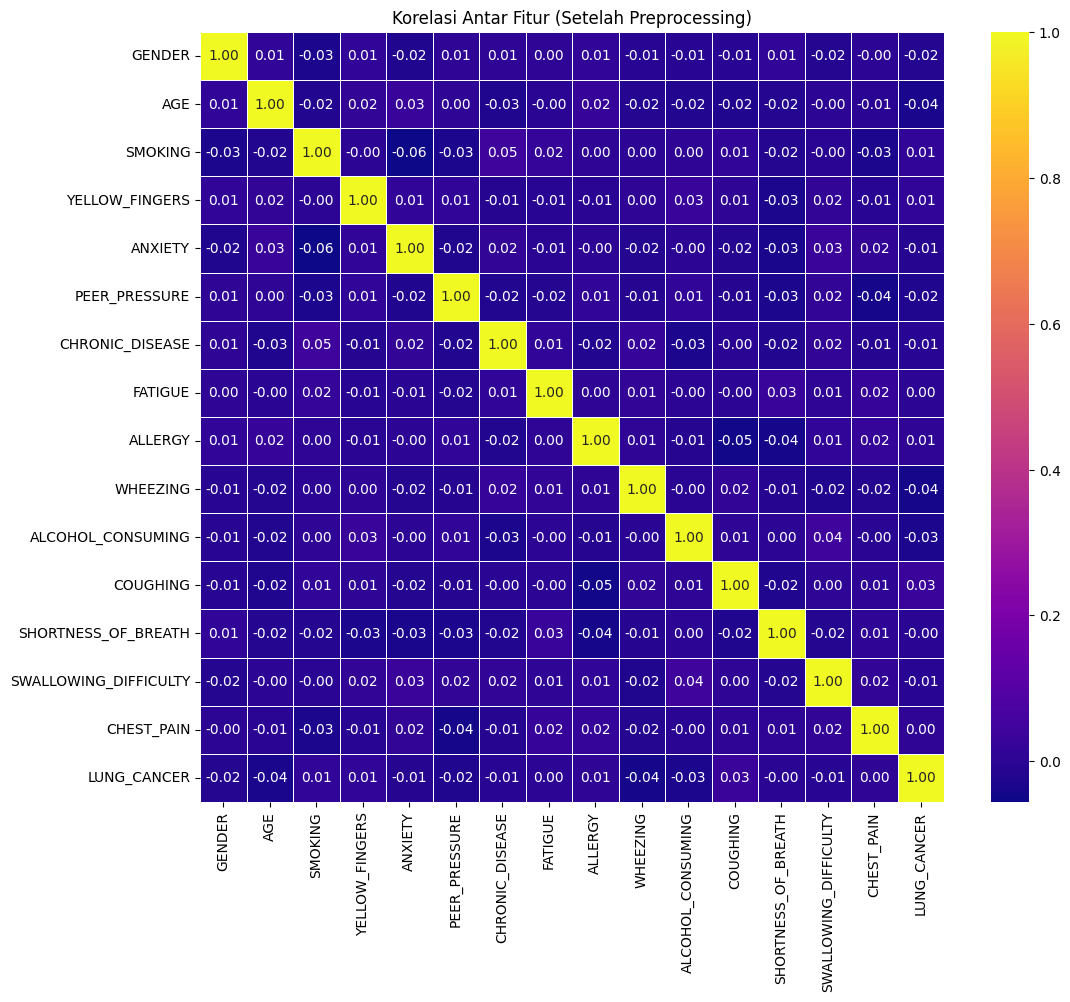

In [36]:
# Visualisasi heatmap korelasi setelah preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(df_processed.corr(numeric_only=True), annot=True, cmap="plasma", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur (Setelah Preprocessing)")
plt.show()

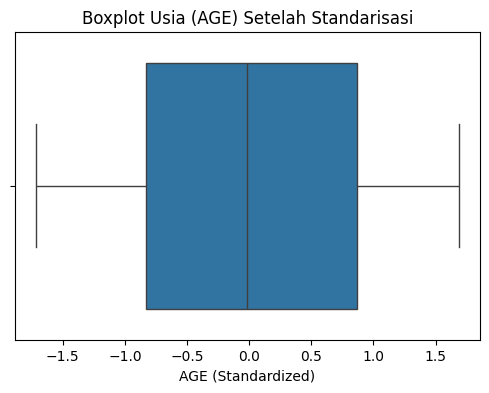

In [37]:
# Boxplot untuk AGE setelah standarisasi
plt.figure(figsize=(6, 4))
sns.boxplot(x=X_train["AGE"])
plt.title("Boxplot Usia (AGE) Setelah Standarisasi")
plt.xlabel("AGE (Standardized)")
plt.show()

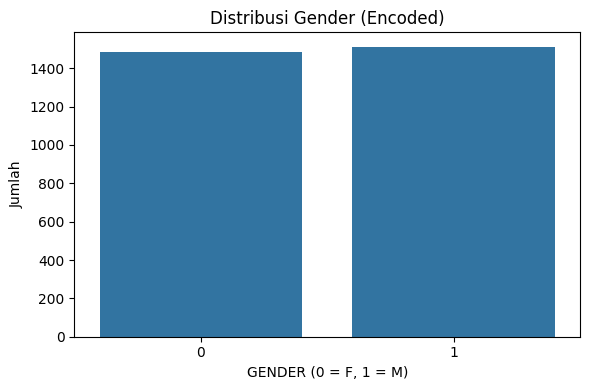

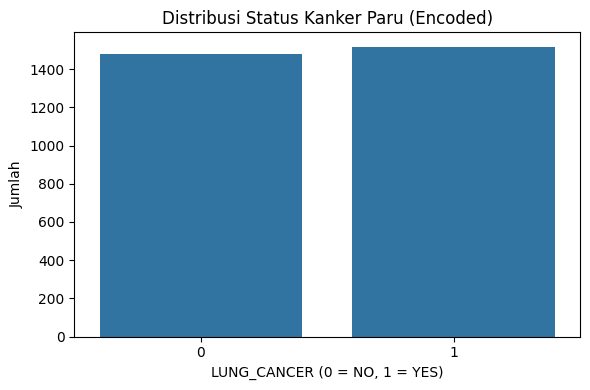

In [41]:
# Visualisasi Fitur Kategorikal Setelah Encoding
plt.figure(figsize=(6, 4))
sns.countplot(x="GENDER", data=df_processed)
plt.title("Distribusi Gender (Encoded)")
plt.xlabel("GENDER (0 = F, 1 = M)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="LUNG_CANCER", data=df_processed)
plt.title("Distribusi Status Kanker Paru (Encoded)")
plt.xlabel("LUNG_CANCER (0 = NO, 1 = YES)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


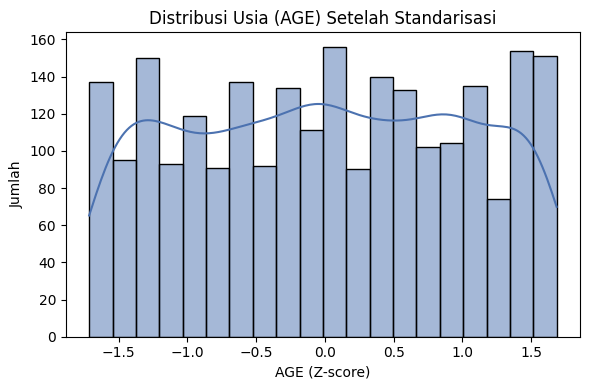

In [40]:
# Visualisasi Distribusi AGE setelah standarisasi
plt.figure(figsize=(6, 4))
sns.histplot(data=X_train, x="AGE", kde=True, bins=20, color="#4C72B0")
plt.title("Distribusi Usia (AGE) Setelah Standarisasi")
plt.xlabel("AGE (Z-score)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


## **Modelling (Pemodelan Klasifikasi)**

### Pemilihan Model

Dua model machine learning diterapkan dalam proyek ini untuk memprediksi status kanker paru-paru (Yes/No) berdasarkan fitur-fitur klinis yang telah diproses, yaitu:

- **Logistic Regression** sebagai baseline model karena sifatnya sederhana, cepat, dan mudah diinterpretasikan.
- **Random Forest Classifier** sebagai model ansambel yang lebih kompleks dan memiliki kemampuan menangkap hubungan non-linear serta tahan terhadap overfitting.

Tujuan dari penggunaan dua model ini adalah untuk membandingkan trade-off antara interpretabilitas dan performa akurasi.

### Kelebihan & Kekurangan Model

- **Logistic Regression**: sederhana, cepat, dan mudah ditafsirkan, namun hanya efektif pada relasi linear.
- **Random Forest**: kuat dalam menangkap relasi kompleks dan tahan terhadap overfitting, tetapi sulit ditafsirkan dan lebih berat secara komputasi.

### Implementasi Model

Pemodelan dilakukan untuk mengklasifikasikan status kanker paru-paru berdasarkan fitur yang telah diproses. Model dilatih menggunakan data training dan dievaluasi berdasarkan metrik: **Accuracy**, **Precision**, **Recall**, dan **F1-Score**.

Model yang digunakan:

- **Model 1**: Logistic Regression  
- **Model 2**: Random Forest Classifier


- Model 1: Logistic Regression

In [42]:
# Logistic Regression

# Inisialisasi model
logreg_model = LogisticRegression(max_iter=10000, random_state=42)

# Latih model
logreg_model.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg_model.predict(X_test)

print("Model Logistic Regression berhasil dibuat dan dilatih.")

Model Logistic Regression berhasil dibuat dan dilatih.


- Model 2: Random Forest Classifier

In [43]:
# Random Forest Classifier

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

print("Model Random Forest Classifier berhasil dibuat dan dilatih.")

Model Random Forest Classifier berhasil dibuat dan dilatih.


## **Evaluasi Model**

- Model 1: Logistic Regression

In [44]:
# Evaluasi Logistic Regression
print("📊 Evaluasi Model Logistic Regression")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_logreg, average='weighted'):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_logreg, average='weighted'):.4f}")
print(f"F1-Score     : {f1_score(y_test, y_pred_logreg, average='weighted'):.4f}")
print("-" * 40)

📊 Evaluasi Model Logistic Regression
Accuracy     : 0.4967
Precision    : 0.4966
Recall       : 0.4967
F1-Score     : 0.4956
----------------------------------------


- Model 2: Random Forest Classifier

In [45]:
# Evaluasi Random Forest Classifier
print("📊 Evaluasi Model Random Forest")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score     : {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("-" * 40)

📊 Evaluasi Model Random Forest
Accuracy     : 0.5367
Precision    : 0.5367
Recall       : 0.5367
F1-Score     : 0.5365
----------------------------------------


* Penjelasan Metrik Evaluasi

  *   **Accuracy**: persentase prediksi benar terhadap total data.
  *   **Precision**: seberapa tepat model dalam memprediksi positif.
  *   **Recall**: seberapa banyak kasus positif yang berhasil ditangkap.
  *   **F1-Score**: rata-rata harmonik dari precision dan recall.



- Visualisasi Hasil Evaluasi Model

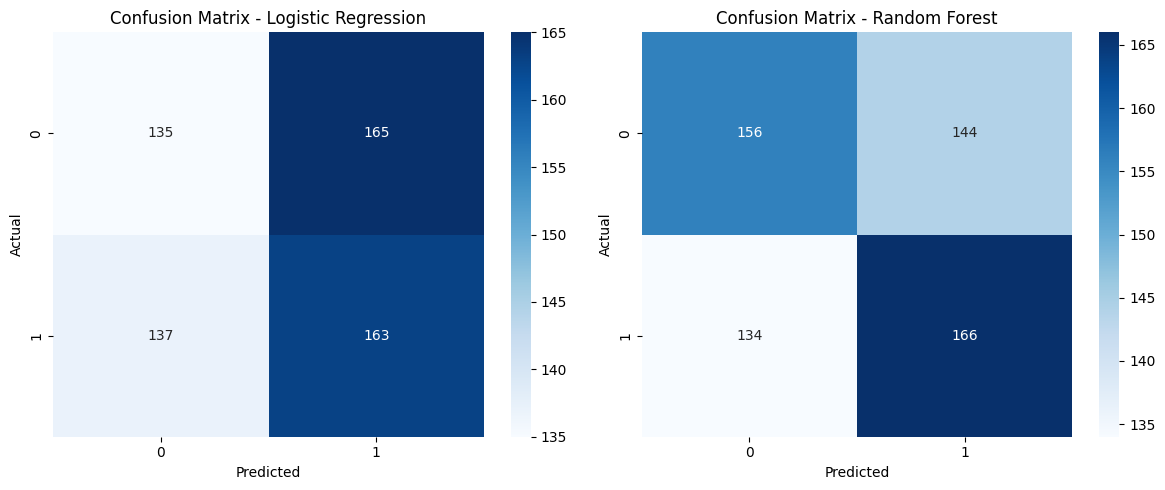

In [46]:
# Visualisasi Confusion Matrix untuk masing-masing model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Model 1: Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Model 2: Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

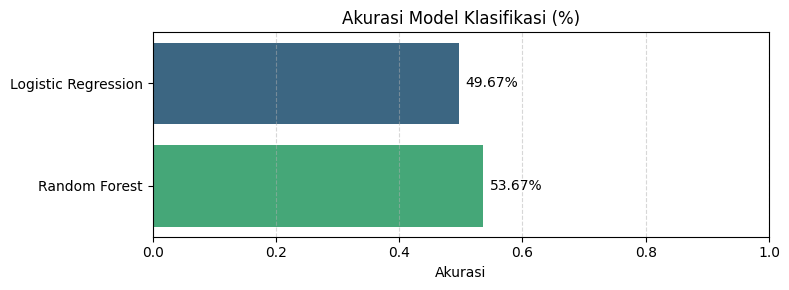

In [49]:
# Visualisasi Perbandingan Akurasi
model_names = ["Logistic Regression", "Random Forest"]
model_accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf)]
persentase = [f"{acc*100:.2f}%" for acc in model_accuracies]

plt.figure(figsize=(8, 3))
barplot = sns.barplot(x=model_accuracies, y=model_names, hue=model_names, palette="viridis", legend=False)

# Label persentase
for bar, label in zip(barplot.patches, persentase):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             label, va='center')

plt.title("Akurasi Model Klasifikasi (%)")
plt.xlabel("Akurasi")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Kesimpulan**

Dalam proyek klasifikasi ini, dua model machine learning diterapkan untuk memprediksi status kanker paru-paru berdasarkan dataset: **Logistic Regression** sebagai baseline model dan **Random Forest Classifier** sebagai model ansambel yang lebih kompleks.

Hasil evaluasi menunjukkan bahwa Random Forest memiliki performa yang sedikit lebih baik dibandingkan Logistic Regression. Rincian metrik evaluasi ditunjukkan pada tabel berikut:

| Model               | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| Logistic Regression| 0.4967   | 0.4966    | 0.4967 | 0.4956   |
| Random Forest      | 0.5367   | 0.5367    | 0.5367 | 0.5365   |

Perbedaan performa ini mengindikasikan bahwa Random Forest lebih mampu menangkap pola yang lebih kompleks dalam data klinis dibandingkan Logistic Regression yang bersifat linear.

Namun, secara keseluruhan akurasi kedua model masih berada di bawah 60%. Hal ini bisa disebabkan oleh beberapa faktor seperti:

- Ketidakseimbangan data atau noise dalam fitur.
- Kompleksitas alami dari data klinis yang sulit dipetakan secara linier.
- Tidak adanya proses tuning atau optimisasi hyperparameter lanjutan.

Meskipun begitu, pemodelan ini telah menunjukkan proses yang valid dan dapat dijadikan fondasi untuk iterasi selanjutnya, misalnya dengan menggunakan teknik seleksi fitur, balancing data, atau tuning model.
